# 02.1 Introduction to Machine Learning

### General concepts

Artificial Intelligence, Machine Learning & Deep Learning


![AI vs ML vs DL](images/ai_ml_dl.png)

Types of Machine Learning
![Types of ML](images/ml_types.jpg)

What ML technique to choose when ?
![Ml Map](images/ml_map.png)

### Predict Rent price!!

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
rent = pd.read_csv("data/rent-ideal.csv")

* Training Data. - Data used to learn from.

* Features - Variables used to learn from.

* Target - Quantity/Label to be learned.


In [12]:
rent.head()

,bedrooms,bathrooms,latitude,longitude,price
0,3,1.5,40.7145,-73.9425,3000
1,2,1.0,40.7947,-73.9667,5465
2,1,1.0,40.7388,-74.0018,2850
3,1,1.0,40.7539,-73.9677,3275
4,4,1.0,40.8241,-73.9493,3350


In [13]:
samev = rent[(rent.bedrooms==0) 
             & (rent.bathrooms==1.0) 
             & (rent.latitude==40.7073) 
             & (rent.longitude==-73.9664)]
samev

,bedrooms,bathrooms,latitude,longitude,price
1470,0,1.0,40.7073,-73.9664,2650
36509,0,1.0,40.7073,-73.9664,2850
39241,0,1.0,40.7073,-73.9664,2950
46405,0,1.0,40.7073,-73.9664,2850


In [14]:
grouped = rent.reset_index(drop=True).groupby(['bedrooms','bathrooms']).mean().reset_index()
grouped = grouped.drop(['latitude','longitude'], axis=1)
grouped.head(10)

,bedrooms,bathrooms,price
0,0,0.0,2872.927152
1,0,1.0,2442.550233
2,0,1.5,3391.111111
3,0,2.0,5354.071429
4,0,4.0,7995.000000
5,1,0.0,2944.191781
6,1,1.0,3015.542693
7,1,1.5,4570.165563
8,1,2.0,4461.000000
9,1,2.5,4872.500000


 
-15.39 x + 5064


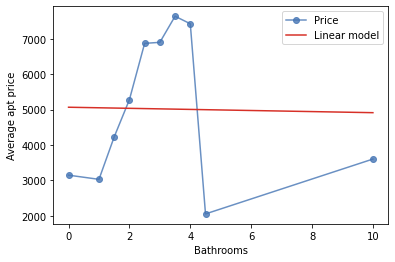

In [15]:
import matplotlib.pyplot as plt
import numpy as np

bookcolors = {'crimson': '#a50026', 'red': '#d73027', 'redorange': '#f46d43',
              'orange': '#fdae61', 'yellow': '#fee090', 'sky': '#e0f3f8', 
              'babyblue': '#abd9e9', 'lightblue': '#74add1', 'blue': '#4575b4',
              'purple': '#313695'}
              
bybaths = rent.groupby(['bathrooms']).mean()
bybaths.reset_index()[['bathrooms','price']]
baths = bybaths.reset_index()['bathrooms']
fit = np.polyfit(baths, bybaths['price'], deg=1)
poly = np.poly1d(fit)
print(poly)
x = [baths.min(), baths.max()]
y = poly(x)

bybaths[['price']].plot(alpha=0.8,marker='o',color=bookcolors['blue'])
plt.plot(x,y, '-', color=bookcolors['red'])

plt.xlabel("Bathrooms")
plt.ylabel("Average apt price")
plt.legend(['Price','Linear model'], loc='upper right')

Linear Model

![Linear Model](images/linear_model.svg)

In [16]:
rent = rent.reset_index(drop=True)
latlong = rent.sort_values(['latitude', 'longitude', 'bathrooms', 'bedrooms'])
specific_lat = latlong[(latlong['bedrooms']>=1) &
                        (latlong['bedrooms']<=2) &
                        (latlong['latitude']>=40.6661) &
                        (latlong['latitude']<=40.6663) &
                        (latlong['longitude']>=-73.9882) &
                        (latlong['longitude']<=-73.9402)]
specific_lat.head(15)

,bedrooms,bathrooms,latitude,longitude,price
701,1,1.0,40.6661,-73.9882,2200
41397,1,1.0,40.6661,-73.9882,2100
41476,1,1.0,40.6661,-73.9882,2100
42254,1,1.0,40.6661,-73.9882,2200
45510,1,1.0,40.6661,-73.9882,2100
408,2,1.0,40.6661,-73.9882,2500
16876,2,1.0,40.6661,-73.9882,2500
40852,2,1.0,40.6661,-73.9882,2500
165,1,1.0,40.6663,-73.9402,1800
9113,1,1.0,40.6663,-73.9402,1800


### Decision Trees

if bedrooms==1 and bathrooms==1.0 and \
       latitude>=40.6661 and latitude<=40.6663 and \
   longitude>=-73.9882 and longitude<=-73.9402:
   price = 2143 # average of 2200,2100,2100,2200,2100,1800,1800


if bedrooms==2 and bathrooms==1.0 and \
   latitude>=40.6661 and latitude<=40.6663 and \
   longitude>=-73.9882 and longitude<=-73.9402:
	price = 2462 # average of 2500,2500,2500,2350
    
![Decision Tree](images/dec_tree.svg)

### RandomForest 

Decision trees suffer from the issue of high variance i.e highly dependent on the training data,  hence we introduce use bootstrapping and ensembling.

* Bootstrapping -  training the small trees(weak learners) on a random selection of the training data instead of all members of the data set.
* Ensembling - training a lot of them and then combining the results.

* Thus combining bootstrapping, ensembling and randomness we get to RandomForest Algorithm (trademark).

* RandomForest can be used in both regression as well as classification problems.

* Can capture non-linear relationships
![Rf vs Lin](images/rf_vs_lin.png)

### ML in one picture
![One Pic](images/one_pic.png)